In [47]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [48]:
#Open file and select desired rows

with open("ECDC_surveillance_data_Antimicrobial_resistance.csv", 'r') as file:
    reader = csv.reader(file)
    all_rows = []
    for row in reader:
        if row[-2] != "-":
            all_rows.append(row[4:-1])

In [49]:
#Use DataFrame package

Years_from_2010 = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
EU_results_weighted = [22.2, 18.6, 18.8, 18.1, 19.6, 19.0, 17.7, 16.8, 16.4, 15.7, 16.7]
EU_data = pd.DataFrame({'Time': Years_from_2010,
                        'RegionCode': 'EU/EEA',
                        'RegionName': 'EU/EEA',
                        'NumValue': EU_results_weighted})

In [50]:
#Prepare the DataFrame

df = pd.DataFrame(data=all_rows[1:], columns=all_rows[0])

df.Time = df.Time.astype(int)
df.RegionName = df.RegionName.astype(str)
df.RegionCode = df.RegionCode.astype(str)
df.NumValue = df.NumValue.astype(float)

In [51]:
#Add the EU data to the DataFrame

df = pd.concat((df, EU_data))

In [52]:
#How to see the DataFrame

df = df.set_index(['RegionName', 'Time']).sort_index().drop(columns='RegionCode')

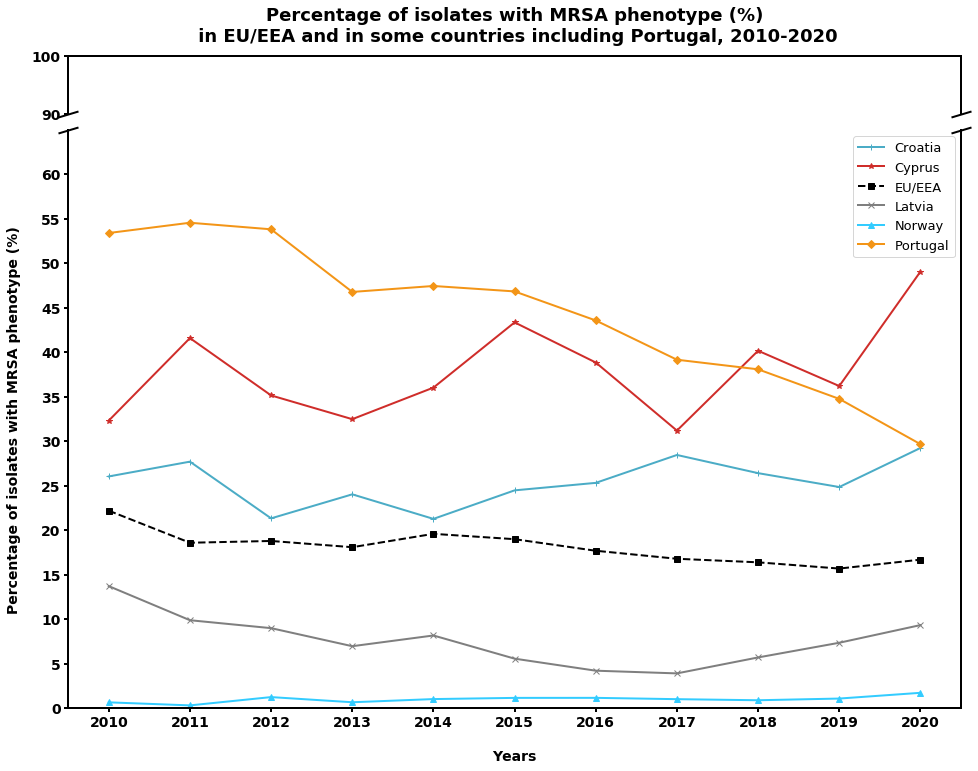

In [53]:
#Plot

selected = ('Portugal', 'Norway', 'EU/EEA', "Croatia", "Cyprus", "Latvia")
colours = {"Portugal": "#f39517", "Norway": "#33ccff", "EU/EEA": "#000000", "Croatia": "#4bacc6", "Cyprus": "#CF2D2A", "Latvia": "#7f7f7f"}
line_styles = {"Portugal": "-", "Norway": "-", "EU/EEA": "--", "Croatia": "-", "Cyprus": "-", "Latvia": "-"}
markers = {"Portugal": "D", "Norway": "^", "EU/EEA": "s", "Croatia": "+", "Cyprus": "*", "Latvia": "x"}

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), gridspec_kw={'height_ratios': [1, 10]})
plt.subplots_adjust(hspace=.05)

for country, data in df.groupby('RegionName', as_index=False):
    if country not in selected:
        continue
    ax2.plot(data.xs(country).loc[2010:], label=country, color=colours[country], marker=markers[country],linestyle=line_styles[country], linewidth=2)
    
ax2.set_ylim(0, 65)
ax2_ticks = np.arange(0, 65, 5)
ax2.set_yticks(ax2_ticks)
ax2.axes.xaxis.set_ticklabels(Years_from_2010, fontsize=14)
ax2.set_yticklabels(ax2_ticks, fontsize=14, weight='bold')
ax2.get_xaxis().set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_bottom()
ax2.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labelbottom=True)
                
ax.set_ylim(90, 100)
ax_ticks = np.arange(90, 110, 10)
ax.set_yticks(ax_ticks)
ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)


d = .3  
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=20,
              linestyle="none", color='k', mec='k', mew=2, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)
ax2.tick_params(width=2, length=4)

plt.ylabel('Percentage of isolates with MRSA phenotype (%)', fontsize=14, fontweight = "bold", labelpad=20)
plt.xlabel('Years', fontsize=14, fontweight = "bold", labelpad=20)
ax.set_title("Percentage of isolates with MRSA phenotype (%)\n in EU/EEA and in some countries including Portugal, 2010-2020", fontsize=18, verticalalignment='center', fontweight = "bold", pad=30)
ax2.legend(loc="upper right", fontsize=13)
plt.xticks(Years_from_2010, fontweight="bold")
plt.savefig("Plot_MRSA.svg", orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()